In [1]:
# script to get and plot TTS for rf08 with varying bl conditions
# date created: 2/17/2020
# author: sofia chelpon

In [2]:
############################ PREP WORKSPACE ############################

In [3]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [4]:
# read in ratios dataframe
path = "/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_bl/contrast_ratios_rf08.pkl"
contrast_ratios = pd.read_pickle(path)
ratios_sort = contrast_ratios.sort_values(['BL_tau'])
ratios_sort.head()

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,RF08_CampAvg,RF08_RF08,RF08_9days
40,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,0.194737,0.212152,0.179781
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.008065,0.004987,0.006345
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.084911,0.169452,0.067036
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.137898,0.175000,0.095444
41,TOGA,n_Butane,1.959376,3.813463,8.057685,0.141763,0.163599,0.089343


In [5]:
# tau, same for all 
tau = ratios_sort['BL_tau'].values
# get gf inputs, same for all 
t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau)

In [6]:
############################ GET TTS OUTPUTS FOR EA. CASE ############################

In [7]:
# --------------- ver 1: UT = RF08, BL = CAMPAIGN AVG.
utbl_cavg = ratios_sort['RF08_CampAvg']

# get tts 
my_mustar_cavg, my_r2_cavg, my_gf_cavg, my_t_cavg, mean_age_cavg, \
    mode_age_cavg, best_k_cavg = tts_mod.get_tts(utbl_cavg, tau, t, exp_decay_matrix, LT)

In [12]:
# --------------- ver 2: UT = RF08, BL = RF08
utbl_rf08 = ratios_sort['RF08_RF08']

# get tts 
my_mustar_rf08, my_r2_rf08, my_gf_rf08, my_t_rf08, mean_age_rf08, \
    mode_age_rf08, best_k_rf08 = tts_mod.get_tts(utbl_rf08, tau, t, exp_decay_matrix, LT)

In [14]:
# --------------- ver 3: UT = RF08, BL = RF06, 07, 08 (9 days prior)
utbl_9days = ratios_sort['RF08_9days']

# get tts 
my_mustar_9days, my_r2_9days, my_gf_9days, my_t_9days, mean_age_9days, \
    mode_age_9days, best_k_9days = tts_mod.get_tts(utbl_9days, tau, t, exp_decay_matrix, LT)

In [15]:
############################ PLOT TTS OUTPUTS FOR EA. CASE ############################

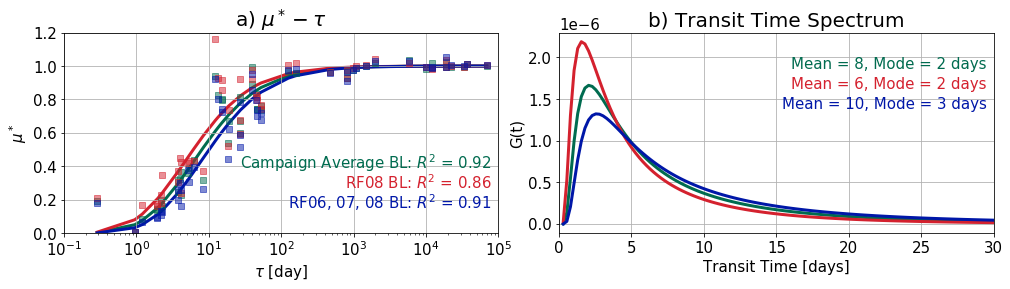

In [16]:
import imp
imp.reload(tts_mod)

# --------------- start plot with campaign avg bl
title_str = 'Campaign Average BL: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau, my_mustar_cavg, utbl_cavg, my_r2_cavg, 
                                        my_gf_cavg, my_t_cavg, mean_age_cavg, mode_age_cavg, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- add rf08 bl case
title_str = 'RF08 BL: '
my_color = [0.83, 0.13, 0.18] # amranth red 
overplot = 1
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau, my_mustar_rf08, utbl_rf08, my_r2_rf08,  
                                        my_gf_rf08, my_t_rf08, mean_age_rf08, mode_age_rf08, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- add 9 days prior bl case
title_str = 'RF06, 07, 08 BL: '
my_color = [0, 0.09, 0.66] #pantone blue
overplot = 2
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau, my_mustar_9days, utbl_9days, my_r2_9days, 
                                        my_gf_9days, my_t_9days, mean_age_9days, mode_age_9days, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- save figure 
svpath = '/Volumes/scdrive2/TTS_2020/get_tts/figures/'
fig.savefig(svpath + 'tts_vary_bl_rf08.pdf')  
#fig.savefig(svpath + 'tts_vary_bl_rf08.svg')  